### Model 1

In [1]:
#Load relevant libraries

print("Model1")
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import random 
random.seed(1994)

Model1


In [2]:
#Cleaning function for price column
def remove2(s):
    return float(s[1:].replace(',',''))

In [3]:
#Reading Data and removing data points with no reviews
data = pd.read_csv("mycsv.csv")
ytrain = pd.read_csv("ylab.csv")
ytrain=ytrain.loc[data['number_of_reviews']!=0]
data=data.loc[data['number_of_reviews']!=0]


In [4]:
data['price'] = data['price'].apply(remove2)

In [5]:
ytrain=ytrain.as_matrix()
ytrain=ytrain[:,0]
data=pd.get_dummies(data, columns = ['host_response_time','room_type','instant_bookable'])
del data['city']
del data['property_type']
del data['host_listings_count']

In [6]:
xtrain=data.as_matrix()
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
imp.fit(xtrain)
xtrain=imp.transform(xtrain)
xtrain=np.asmatrix(xtrain)



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.25, random_state=100)

In [8]:
clf = RandomForestClassifier(n_estimators=200,class_weight='balanced',max_depth=16,max_features="auto",random_state=25)
#clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=16, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [9]:
scores=cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5))
print("Train Acc: ",scores.mean())

Train Acc:  0.876573324391


In [10]:
print("Test Acc:",clf.score(X_test, y_test))
y_pred=clf.predict(X_test)
y_proba=clf.predict_proba(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Test Acc: 0.880831731609
Confusion Matrix
[[4518  386]
 [ 296  523]]


             precision    recall  f1-score   support

      False       0.94      0.92      0.93      4904
       True       0.58      0.64      0.61       819

avg / total       0.89      0.88      0.88      5723

AUC : 0.884401634708


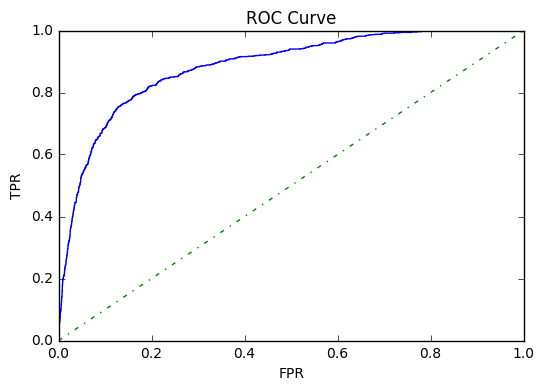

In [11]:
print(classification_report(y_test,y_pred))
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
plt.plot(fpr1,tpr1)
print("AUC :",metrics.auc(fpr1,tpr1))
plt.plot([0,1],linestyle='-.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

### Model 2

In [12]:
print("Model 2")
data = pd.read_csv("mycsv.csv")
ytrain = pd.read_csv("ylab.csv")
ytrain=ytrain.loc[data['number_of_reviews']!=0]
data=data.loc[data['number_of_reviews']!=0]
del data['city']
del data['property_type']
del data['host_listings_count']
data=pd.get_dummies(data, columns = ['host_response_time','room_type','instant_bookable'])
data['price'] = data['price'].apply(remove2)



Model 2


In [13]:
xtrain=data.as_matrix()
ytrain=ytrain.as_matrix()
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
imp.fit(xtrain)
xtrain=imp.transform(xtrain)
xtrain=np.asmatrix(xtrain)
ytrain=ytrain[:,0]


In [14]:
index0 = np.where(ytrain == False)
index1 = np.where(ytrain ==True)
index0 = index0[0].tolist()
index1 = index1[0].tolist()



In [15]:
import random
a = random.sample(index0,3000)
b =random.sample(index1,3000)
xt = np.concatenate((xtrain[a],xtrain[b]),axis=0)
yt = np.concatenate((ytrain[a],ytrain[b]),axis=0)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size=0.25, random_state=100,stratify=yt)

In [17]:
clf = RandomForestClassifier(n_estimators=200,random_state=25,max_depth=16)
#clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [18]:
scores=cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5))
print("Train Acc:",scores.mean())

Train Acc: 0.799333333333


In [19]:
print("Test Acc:",clf.score(X_test, y_test))
y_pred=clf.predict(X_test)
y_proba=clf.predict_proba(X_test)

print("Confusion Matrix ")
print(confusion_matrix(y_test,y_pred))

Test Acc: 0.794
Confusion Matrix 
[[600 150]
 [159 591]]


             precision    recall  f1-score   support

      False       0.79      0.80      0.80       750
       True       0.80      0.79      0.79       750

avg / total       0.79      0.79      0.79      1500

AUC : 0.883075555556


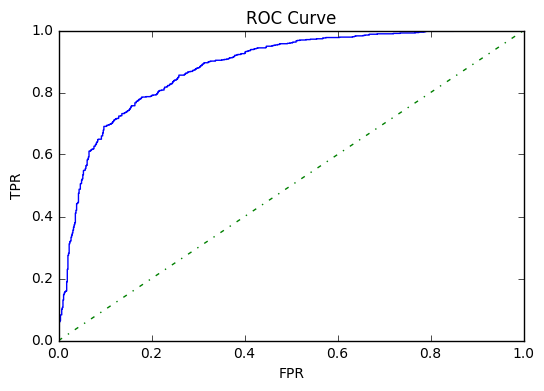

In [20]:
print(classification_report(y_test,y_pred))
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
print("AUC :",metrics.auc(fpr2,tpr2))
plt.plot(fpr2,tpr2)
plt.plot([0,1],linestyle='-.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()


### Model 3

In [21]:
data = pd.read_csv("mycsv.csv")
ytrain = pd.read_csv("ylab.csv")
ytrain=ytrain.loc[data['number_of_reviews']!=0]
data=data.loc[data['number_of_reviews']!=0]
data['price'] = data['price'].apply(remove2)
data=data[['host_response_rate','host_response_time','review_scores_rating','number_of_reviews']]
data=pd.get_dummies(data, columns = ['host_response_time'])



In [22]:
xtrain=data.as_matrix()
y_train=ytrain.as_matrix()
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imp.fit(xtrain)
xtrain=imp.transform(xtrain)
xtrain=np.asmatrix(xtrain)
y_train=y_train[:,0]


In [23]:
import random
index0 = np.where(y_train == False)
index1 = np.where(y_train ==True)
index0 = index0[0].tolist()
index1 = index1[0].tolist()
a = random.sample(index0,3000)
b =random.sample(index1,3000)
xt = np.concatenate((xtrain[a],xtrain[b]),axis=0)
yt = np.concatenate((y_train[a],y_train[b]),axis=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size=0.25, random_state=100,stratify=yt)

In [24]:
clf = RandomForestClassifier(n_estimators=200,max_depth=16,min_samples_leaf=4,random_state=25)
#clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [25]:
scores=cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5))
print("Train Acc:",scores.mean())

Train Acc: 0.801333333333


In [26]:
print("Test Acc:",clf.score(X_test, y_test))
y_pred=clf.predict(X_test)
y_proba=clf.predict_proba(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Test Acc: 0.788666666667
Confusion Matrix
[[622 128]
 [189 561]]


             precision    recall  f1-score   support

      False       0.77      0.83      0.80       750
       True       0.81      0.75      0.78       750

avg / total       0.79      0.79      0.79      1500

0.866580444444


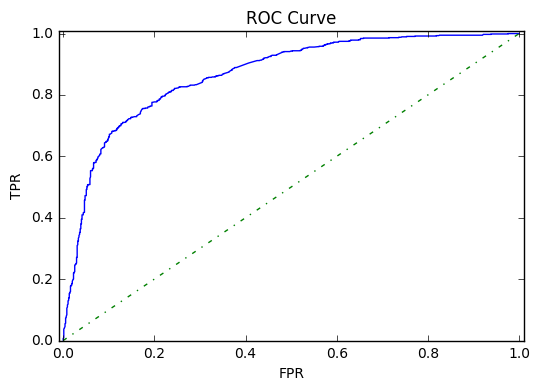

In [27]:
print(classification_report(y_test,y_pred))
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
print(metrics.auc(fpr3,tpr3))
plt.plot(fpr3,tpr3)
plt.plot([0,1],linestyle='-.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.xlim(-.01,1.01)
plt.ylim(0,1.01)
plt.show()